# Credit Risk Modelling

**Description:**
In this competition, you must explore and cleanse a dataset consisting of over 111,000 loan records to determine the best way to predict whether a loan applicant will fully repay or default on a loan. You must then build a machine learning model that returns the unique loan ID and a loan status label that indicates whether the loan will be fully paid or charged off.

### Getting all the Dependencies

In [ ]:
# # Installing dependencies
# !pip install --upgrade pip
# !pip install numpy --upgrade --user
# !pip install pandas --upgrade --user
# !pip install scikit-learn --upgrade --user

In [ ]:
# Avoiding Warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 38.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
import sklearn
sklearn.__version__

'0.24.1'

In [ ]:
# Importing Dependencies
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

### Loading the Data

In [ ]:
# Importing Dataset
data = pd.read_csv('LoansTrainingSet.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,111107.000,89769.000,89769.000,111107.000,52104.000,111107.000,111107.000,111107.000,110879.000,111096.000
mean,11477180.218,1075.795,72485.998,18.201,34.902,11.125,0.168,15483.141,0.118,0.029
std,31855079.735,1474.134,55930.943,7.014,21.971,5.010,0.484,19821.154,0.351,0.261
min,491.000,585.000,4033.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000
25%,8162.000,705.000,44688.000,13.500,16.000,8.000,0.000,5905.000,0.000,0.000
50%,14183.000,724.000,61752.000,16.900,32.000,10.000,0.000,11027.000,0.000,0.000
75%,23822.000,741.000,86887.000,21.700,51.000,14.000,0.000,19338.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,70.500,176.000,76.000,15.000,1730472.000,7.000,15.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

### Describing the data

In [ ]:
# For each column heading we replace " " and convert the heading in lowercase 
cleancolumn = []
for i in range(len(data.columns)):
    cleancolumn.append(data.columns[i].replace(' ', '_').lower())
data.columns = cleancolumn

In [ ]:
data.head(20)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.000,< 1 year,Rent,46643.000,Debt Consolidation,777.39,18.000,10.000,12,0,6762,7946,0.000,0.000
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.000,10+ years,Home Mortgage,81099.000,Debt Consolidation,892.09,26.700,nan,14,0,35706,77961,0.000,0.000
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.000,9 years,Home Mortgage,60438.000,Home Improvements,1244.02,16.700,32.000,11,1,11275,14815,1.000,0.000
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.000,3 years,Rent,34171.000,Debt Consolidation,990.94,10.000,nan,21,0,7009,43533,0.000,0.000
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.000,10+ years,Home Mortgage,47003.000,Home Improvements,503.71,16.700,25.000,13,1,16913,19553,1.000,0.000
5,7e9f6759-6a13-48ef-adfa-ef9fbcfcfcc8,05301ee5-29ec-48b6-b3e5-0813ea25d684,Charged Off,11911,Short Term,7420.000,2 years,Home Mortgage,70475.000,other,886.81,17.700,nan,13,0,28212,59897,0.000,0.000
6,c2b0aa3e-555b-441b-a4aa-e0e4a52c87d3,db3e74ec-2123-4608-be8d-a93e98cabfcf,Charged Off,28988,Short Term,7420.000,3 years,Home Mortgage,58074.000,Debt Consolidation,871.11,22.800,nan,9,0,14423,54018,0.000,0.000
7,233e0119-6dfe-47c0-a212-b4cc00371c8d,def66e46-951e-4bff-bf96-87ae6e092e19,Charged Off,17705,Long Term,6630.000,3 years,Own Home,49180.000,Debt Consolidation,274.59,30.200,nan,10,1,4252,25012,1.000,0.000
8,fc9d109b-15c2-4fe3-b7d8-27610b89f80b,f54c53e4-acd7-4e29-8f55-d2a247a4b62a,Charged Off,16812,Short Term,7360.000,7 years,Rent,50945.000,Debt Consolidation,590.12,14.600,nan,9,0,12903,15379,0.000,0.000
9,35ee60ed-df2d-4d3a-98ba-03d944d65c74,93cbb4b9-4e88-4b93-8beb-a2a00d415cd5,Charged Off,9796,Long Term,6720.000,< 1 year,Rent,58776.000,Debt Consolidation,666.13,9.400,17.000,12,0,4939,15198,0.000,0.000


In [ ]:
print(data.shape)
data.describe()

(111107, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,111107.000,89769.000,89769.000,111107.000,52104.000,111107.000,111107.000,111107.000,110879.000,111096.000
mean,11477180.218,1075.795,72485.998,18.201,34.902,11.125,0.168,15483.141,0.118,0.029
std,31855079.735,1474.134,55930.943,7.014,21.971,5.010,0.484,19821.154,0.351,0.261
min,491.000,585.000,4033.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000
25%,8162.000,705.000,44688.000,13.500,16.000,8.000,0.000,5905.000,0.000,0.000
50%,14183.000,724.000,61752.000,16.900,32.000,10.000,0.000,11027.000,0.000,0.000
75%,23822.000,741.000,86887.000,21.700,51.000,14.000,0.000,19338.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,70.500,176.000,76.000,15.000,1730472.000,7.000,15.000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_id                       111107 non-null  object 
 1   customer_id                   111107 non-null  object 
 2   loan_status                   111107 non-null  object 
 3   current_loan_amount           111107 non-null  int64  
 4   term                          111107 non-null  object 
 5   credit_score                  89769 non-null   float64
 6   years_in_current_job          106414 non-null  object 
 7   home_ownership                111107 non-null  object 
 8   annual_income                 89769 non-null   float64
 9   purpose                       111107 non-null  object 
 10  monthly_debt                  111107 non-null  object 
 11  years_of_credit_history       111107 non-null  float64
 12  months_since_last_delinquent  52104 non-null

### Removing the duplicates

Loan ID is unique for every loan process so we will use Loan ID to remove duplicates

In [ ]:
# Check the unique values, to see if there is any duplicates
unique_loanid=data['loan_id'].unique().tolist()
print("Total samples in data:", str(data.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(data.shape[0] - len(unique_loanid)))

Total samples in data: 111107
Total unique samples in data: 88910
Duplicate samples in data: 22197


In [ ]:
# Drop the duplicates
data = data.drop_duplicates()
print("Total samples in data:", str(data.shape[0]))
print("Total unique samples in data:", str(len(unique_loanid)))
print("Duplicate samples in data:", str(data.shape[0] - len(unique_loanid)))

Total samples in data: 105238
Total unique samples in data: 88910
Duplicate samples in data: 16328


In [ ]:
#Get the duplicates
dup_loanid=data[data.duplicated(['loan_id'],keep=False)]
print(dup_loanid.shape)
dup_loanid.describe()

(32656, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,32656.000,27407.000,27407.000,32656.000,17198.000,32656.000,32656.000,32656.000,32604.000,32650.000
mean,13554181.593,700.004,72628.640,17.760,34.160,11.189,0.198,15588.947,0.137,0.034
std,34211633.604,24.506,47963.287,6.880,21.711,5.134,0.525,19100.481,0.379,0.280
min,701.000,585.000,5855.000,3.700,0.000,1.000,0.000,0.000,0.000,0.000
25%,8823.500,690.000,44946.000,13.000,16.000,8.000,0.000,5730.500,0.000,0.000
50%,15230.000,708.000,62025.000,16.600,31.000,10.000,0.000,10930.000,0.000,0.000
75%,26957.750,718.000,87434.000,21.300,50.000,14.000,0.000,19518.250,0.000,0.000
max,99999999.000,725.000,1181520.000,65.000,120.000,56.000,11.000,683524.000,5.000,11.000


In [ ]:
# dup_loanid.tail(5)
dup_loanid[dup_loanid.loan_id == 'c02558d1-58cb-4b36-9569-ae55baeb328a']
# dup_loanid[dup_loanid.loan_id == '9a411ca4-2d32-4f92-aefa-337c5562741b']

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
32227,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,nan,5 years,Home Mortgage,nan,Debt Consolidation,875.67,13.100,6.000,4,0,384,985,0.000,0.000
109692,c02558d1-58cb-4b36-9569-ae55baeb328a,f0804ea2-249b-4e6c-ab2a-1554a7ff6a5b,Fully Paid,3571,Short Term,700.000,5 years,Home Mortgage,41370.000,Debt Consolidation,875.670,13.100,6.000,4,0,384,985,0.000,0.000


In [ ]:
#Sort the duplicate dataframe in ascending order with NA's in last
sorted_df=dup_loanid.sort_values(['current_loan_amount', 'credit_score'], ascending=True, na_position='last')
sorted_df.tail(10)

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
17021,df34de5c-d7aa-49a0-b293-ff8b49779607,d67425db-00be-4d2e-9970-299df0f8d223,Fully Paid,99999999,Short Term,725.000,NaN,Own Home,24065.000,Home Improvements,99.27,26.700,nan,3,1,4106,6820,1.000,0.000
17024,3363bad1-592d-463c-8320-71795d60b588,79fbab84-04d5-438f-85ec-77a1c8234535,Fully Paid,99999999,Short Term,725.000,10+ years,Home Mortgage,50690.000,Debt Consolidation,340.89,29.000,43.000,12,1,5747,16954,0.000,0.000
17075,3d97575f-cc18-48ef-b647-a4cc798e2186,f41b6c6c-06a2-4a57-8eff-7bc69f07aa40,Fully Paid,99999999,Short Term,725.000,10+ years,Home Mortgage,84473.000,Debt Consolidation,1956.96,18.900,nan,11,0,56229,60723,0.000,0.000
17184,70301a96-1836-409b-87d0-e011867ba867,4495f69b-22d1-4e5a-914d-3557bb506fba,Fully Paid,99999999,Long Term,725.000,9 years,Rent,102501.000,Debt Consolidation,460.41,13.900,63.000,8,1,17583,27910,1.000,0.000
17219,4e316760-c7ee-457a-b14d-fc4a5929155f,be35080d-5270-44dc-9b4c-30ab9de4cf17,Fully Paid,99999999,Short Term,725.000,6 years,Home Mortgage,59886.000,Debt Consolidation,427.19,21.400,nan,8,1,6159,6587,1.000,0.000
17275,168c3750-5c77-4ee5-b62a-128ca3321a52,2af8676a-b871-4d42-bcc3-57610cc2a04a,Fully Paid,99999999,Short Term,725.000,10+ years,Home Mortgage,32579.000,Debt Consolidation,627.15,17.500,nan,15,0,13856,19966,0.000,0.000
17405,9a411ca4-2d32-4f92-aefa-337c5562741b,ffe6c960-298d-4a61-8cb3-b3f0d24751ba,Fully Paid,99999999,Short Term,725.000,7 years,Rent,79008.000,Take a Trip,974.44,7.700,11.000,11,0,7264,15521,0.000,0.000
17584,39760a90-9c99-49eb-a4a2-befd24207319,3f378b62-8ab0-4e53-b8db-e13c59918417,Fully Paid,99999999,Short Term,725.000,9 years,Rent,190347.000,other,2125.55,16.400,19.000,11,0,13465,23831,0.000,0.000
17770,0c034f37-8afe-4197-bf6d-8ee06b4b2224,78a5bc94-7e8c-4df1-a2d5-cbcd0b7a1a60,Fully Paid,99999999,Short Term,725.000,10+ years,Home Mortgage,60198.000,Debt Consolidation,1710.63,17.600,48.000,17,0,11582,21689,0.000,0.000
17773,143f0901-8688-400f-b3f4-cfcadd2b0fc3,ccefb98e-4c90-4f6b-83cc-c057f6e7eee6,Fully Paid,99999999,Short Term,725.000,10+ years,Home Mortgage,43008.000,Business Loan,723.97,18.700,nan,8,0,3290,6243,0.000,0.000


In [ ]:
#Considering samples which are genuine
correct_df = sorted_df.drop_duplicates(['loan_id'], keep='first')
print(correct_df.shape)
correct_df.head()

(16328, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
61783,50118373-dd2c-402d-918b-a9e49d921eac,66a2647a-daec-494b-8588-2c846bba495f,Fully Paid,701,Short Term,718.000,< 1 year,Rent,19040.000,Debt Consolidation,196.74,11.600,nan,4,0,0,0,0.000,0.000
55591,95ee0fe0-7e24-4b6d-bd08-797164f72ceb,cf0027fa-0825-4f09-8421-9d5cf90f558a,Fully Paid,975,Short Term,713.000,6 years,Rent,24378.000,Medical Bills,692.73,7.100,nan,10,0,4403,7313,0.000,0.000
89266,8e00abc0-5851-42ab-b25f-9855abaaf05a,95d93b04-476b-4238-826a-4148e846d9a7,Fully Paid,976,Short Term,683.000,10+ years,Rent,46824.000,Other,924.770,22.000,62.000,13,0,31614,40583,0.000,0.000
51100,d9cd4ffd-b274-466e-9c6a-6561f09721fe,b415677e-0c22-4ba5-a069-51045a21e351,Fully Paid,976,Short Term,718.000,10+ years,Home Mortgage,59536.000,other,1215.53,27.100,15.000,14,0,28791,53218,0.000,0.000
41869,0f5850ad-1c8d-4145-b796-7eead9ff4cbb,9747b64f-ad09-42f6-87ac-c34192972a92,Fully Paid,978,Short Term,680.000,NaN,Rent,39699.000,other,840.29,41.800,7.000,6,0,4263,7401,0.000,0.000


In [ ]:
#Check if there is any such placeholder in duplicates
correct_df[correct_df['current_loan_amount']==99999999]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [ ]:
#check if there is still Na's in duplicates
correct_df[correct_df['credit_score'].isnull()]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens


In [ ]:
# Droping the duplicate loan ID's 
data.drop_duplicates(['loan_id'], keep=False, inplace=True)

In [ ]:
data.shape

(72582, 19)

In [ ]:
# Getting the final train data which is all genuine
data = data.append(correct_df, ignore_index=True)
print(data.shape)
data.describe()

(88910, 19)


,current_loan_amount,credit_score,annual_income,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,bankruptcies,tax_liens
count,88910.000,72821.000,72821.000,88910.000,40404.000,88910.000,88910.000,88910.000,88718.000,88902.000
mean,9365954.611,1163.220,72404.817,18.315,35.080,11.110,0.160,15435.933,0.113,0.028
std,29113854.230,1624.255,57713.555,7.049,22.009,4.978,0.474,19658.726,0.343,0.258
min,491.000,585.000,4033.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000
25%,8066.000,711.000,44638.000,13.500,16.000,8.000,0.000,5949.000,0.000,0.000
50%,13386.500,731.000,61585.000,17.000,32.000,10.000,0.000,11039.000,0.000,0.000
75%,21611.750,743.000,86785.000,21.800,51.000,14.000,0.000,19301.000,0.000,0.000
max,99999999.000,7510.000,8713547.000,70.500,176.000,76.000,15.000,1730472.000,7.000,15.000


### Preprocessing / Cleaning the data

#### Feature: Years in Current Job

Remove the special charachters and other words and make it numeric.

In [ ]:
data['years_in_current_job'].unique()

array(['< 1 year', '10+ years', '9 years', '3 years', '2 years',
       '7 years', '6 years', '1 year', '5 years', '4 years', '8 years',
       nan], dtype=object)

In [ ]:
data['years_in_current_job'] = [0 if str(x)=='< 1 year' else x if str(x)=='nan' else int(re.findall(r'\d+', str(x))[0]) for x in data['years_in_current_job']]
data['years_in_current_job'].unique()

array([ 0., 10.,  9.,  3.,  2.,  7.,  6.,  1.,  5.,  4.,  8., nan])

#### Feature: Credit Score

Credit Score range is from 0 to 800 but there are some values greater than this basically this is some data error.

In [ ]:
data['credit_score'].head(10)

0   7280.000
1   7330.000
2   7240.000
3   7400.000
4   6860.000
5   7420.000
6   7420.000
7   6630.000
8   7360.000
9   6720.000
Name: credit_score, dtype: float64

In [ ]:
# Function to bring credit score in range
def credit_range(x):
    if x > 800:
        return int(x/10)
    elif str(x) == 'nan' : 
        return x
    else:
        return int(x)

In [ ]:
data['credit_score'] = data['credit_score'].map(credit_range)
data['credit_score'].head(10)

0   728.000
1   733.000
2   724.000
3   740.000
4   686.000
5   742.000
6   742.000
7   663.000
8   736.000
9   672.000
Name: credit_score, dtype: float64

#### Feature: Maximum Open Credit

There is one data error which needs to be handled.

In [ ]:
print(data.shape)
data[data['maximum_open_credit']=='#VALUE!']

(88910, 19)


,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
4930,e42ae1f7-74b5-46d7-95ce-46a88918ba12,a679ed55-963a-4de6-8be0-4364eb601b6f,Charged Off,2052,Short Term,703.000,10.000,Rent,95105.000,Debt Consolidation,1910.02,22.400,37.000,9,0,0,#VALUE!,0.000,0.000
28112,b798f46b-e27b-4823-af83-294b1ffc3490,f61890c5-e264-4b0f-a047-9cfa03b9d182,Charged Off,1470,Short Term,nan,2.000,Rent,nan,Debt Consolidation,506.34,15.300,26.000,3,0,0,#VALUE!,0.000,0.000


In [ ]:
data = data[data['maximum_open_credit'] != '#VALUE!']
data['maximum_open_credit']= pd.to_numeric(data['maximum_open_credit'])
data.shape

(88908, 19)

#### Feature: Monthly Debt

In [ ]:
data['monthly_debt']

0         777.39
1         892.09
2        1244.02
3         990.94
4         503.71
          ...   
88905    2102.97
88906   2044.480
88907   2327.800
88908   1537.500
88909   6005.530
Name: monthly_debt, Length: 88908, dtype: object

Monthly debt has Currency symbol due to which its datatype is string, remove it and convert it to numeric.

In [ ]:
data['monthly_debt']=data['monthly_debt'].str.strip('$')
data['monthly_debt']=pd.to_numeric(data['monthly_debt'])
data['monthly_debt'].describe()

count   55863.000
mean      954.744
std       628.235
min         0.000
25%       528.520
50%       836.510
75%      1240.750
max     10831.650
Name: monthly_debt, dtype: float64

### Handling Missing Values and Outliers

Describe the data and check which feature has Missing Values and if there is any Outlier. 

In [ ]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,88908.000,72820.000,85091.000,72820.000,55863.000,88908.000,40402.000,88908.000,88908.000,88908.000,88908.000,88716.000,88900.000
mean,9366165.261,720.048,5.870,72404.505,954.744,18.315,35.080,11.110,0.160,15436.280,35965.310,0.113,0.028
std,29114147.815,27.814,3.630,57713.890,628.235,7.049,22.009,4.978,0.474,19658.811,404180.506,0.343,0.258
min,491.000,585.000,0.000,4033.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8066.750,708.000,3.000,44637.500,528.520,13.500,16.000,8.000,0.000,5949.000,12775.000,0.000,0.000
50%,13387.000,728.000,6.000,61585.000,836.510,17.000,32.000,10.000,0.000,11039.000,21781.000,0.000,0.000
75%,21612.250,741.000,10.000,86785.000,1240.750,21.800,51.000,14.000,0.000,19301.000,36367.000,0.000,0.000
max,99999999.000,751.000,10.000,8713547.000,10831.650,70.500,176.000,76.000,15.000,1730472.000,69988086.000,7.000,15.000


#### Outlier treatment: Current Loan Amount

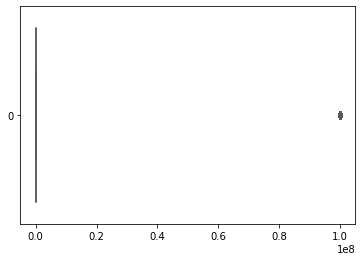

In [ ]:
ax = sns.boxplot(data=data['current_loan_amount'], orient="h", palette="Set2")

In [ ]:
# check the description their is a placeholder in max value
data[data['current_loan_amount']==99999999.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
5044,bac918fa-35e0-40a2-af65-58b456a742e7,c96da120-30d2-4acd-9740-e4d280f4bfcb,Fully Paid,99999999,Short Term,739.000,3.000,Home Mortgage,60012.000,Home Improvements,1295.260,16.600,33.000,16,0,427,8542,0.000,0.000
5045,0c7fcf5e-ec4a-46d5-8175-15c846df7c74,a709e893-b6b6-49ed-b775-bdef1155c78d,Fully Paid,99999999,Short Term,751.000,5.000,Rent,35693.000,Debt Consolidation,626.120,11.000,nan,7,0,742,9166,0.000,0.000
5046,878c4189-bd53-4836-a16d-203519034758,64fa8876-80fa-4a69-b16b-144a8ecfb14a,Fully Paid,99999999,Short Term,735.000,nan,Home Mortgage,33884.000,Debt Consolidation,683.340,18.900,10.000,12,0,10835,18028,0.000,0.000
5047,193ac878-4d50-4be0-995b-20896ebc9ad8,02a4bc6d-db02-406b-9bf6-8e0dd42782eb,Fully Paid,99999999,Short Term,745.000,3.000,Own Home,103343.000,Debt Consolidation,1300.410,14.100,nan,14,0,22746,42835,0.000,0.000
5048,4b04d7e9-5c67-4437-95f5-8527c9386aaa,2eaf89af-c240-4133-8c89-277128c9e2d2,Fully Paid,99999999,Short Term,736.000,6.000,Home Mortgage,98140.000,Home Improvements,536.500,18.500,59.000,11,1,762,1963,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13355,691f7f49-7813-4ec7-9f33-092a92290cc8,92f6f74b-f901-4a04-83fd-0af851e00466,Fully Paid,99999999,Short Term,738.000,0.000,Rent,50980.000,Debt Consolidation,671.230,12.500,23.000,7,0,9167,11416,0.000,0.000
13356,168080e2-2786-4089-952e-f4451fa8947f,e09ceea6-5e15-46a8-b8e0-ca45715b70db,Fully Paid,99999999,Short Term,738.000,10.000,Own Home,58632.000,Debt Consolidation,869.710,19.600,47.000,12,0,14234,19552,0.000,0.000
13357,fbd7e5e8-c666-4e53-8a7e-6e95f5ecf22b,2f1b37fa-5f91-44d3-adcb-cf5f67f00e07,Fully Paid,99999999,Short Term,730.000,6.000,Home Mortgage,34591.000,other,464.090,26.000,nan,6,0,12070,22229,0.000,0.000
13358,1245eb4b-d74e-4d32-a211-1a0700e537b8,8872301a-a824-4d6f-b1a4-cb6cd5a36c57,Fully Paid,99999999,Short Term,743.000,10.000,Rent,76144.000,Debt Consolidation,666.260,18.300,94.000,11,0,12954,44062,0.000,0.000


In [ ]:
#There are such 8316 samples, which is not low so need to replace it by NA's
data['current_loan_amount'] = [np.nan if int(x)==99999999 else x for x in data['current_loan_amount']]

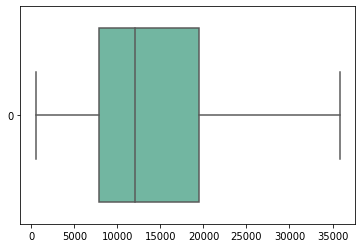

In [ ]:
ax = sns.boxplot(data=data['current_loan_amount'], orient="h", palette="Set2")

In [ ]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,80592.000,72820.000,85091.000,72820.000,55863.000,88908.000,40402.000,88908.000,88908.000,88908.000,88908.000,88716.000,88900.000
mean,13984.382,720.048,5.870,72404.505,954.744,18.315,35.080,11.110,0.160,15436.280,35965.310,0.113,0.028
std,8291.838,27.814,3.630,57713.890,628.235,7.049,22.009,4.978,0.474,19658.811,404180.506,0.343,0.258
min,491.000,585.000,0.000,4033.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7810.750,708.000,3.000,44637.500,528.520,13.500,16.000,8.000,0.000,5949.000,12775.000,0.000,0.000
50%,12058.000,728.000,6.000,61585.000,836.510,17.000,32.000,10.000,0.000,11039.000,21781.000,0.000,0.000
75%,19493.250,741.000,10.000,86785.000,1240.750,21.800,51.000,14.000,0.000,19301.000,36367.000,0.000,0.000
max,35875.000,751.000,10.000,8713547.000,10831.650,70.500,176.000,76.000,15.000,1730472.000,69988086.000,7.000,15.000


#### Outlier treatment: Annual Income

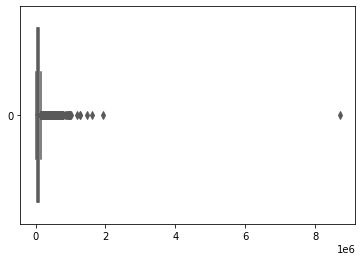

In [ ]:
ax = sns.boxplot(data=data['annual_income'], orient="h", palette="Set2")

In [ ]:
data[data['annual_income']==8713547.000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
3671,6dfd2f9c-b796-4cb3-8f71-04d6ae8a8f92,ceee183a-9b02-4b82-ae53-14ccd5f785fd,Charged Off,8006.000,Short Term,725.000,10.000,Home Mortgage,8713547.000,Debt Consolidation,798.740,16.000,nan,11,0,16462,30429,0.000,0.000


In [ ]:
data = data[data['annual_income']!=8713547.000]
data.shape

(88907, 19)

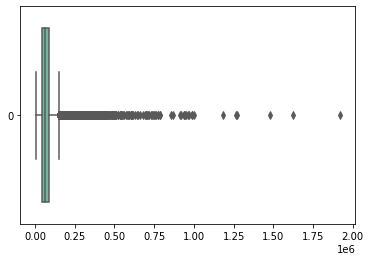

In [ ]:
ax = sns.boxplot(data=data['annual_income'], orient="h", palette="Set2")

In [ ]:
data[data['annual_income']>1200000]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
182,d728b670-7248-4c64-b99e-251d9e7b88a2,a0222c05-0157-4791-b2b9-c74d51774d16,Charged Off,34430.000,Long Term,739.000,0.000,Home Mortgage,1623105.000,Debt Consolidation,2637.550,14.700,17.000,15,0,26265,69668,0.000,0.000
39804,076e5ce5-cc5a-4c3e-8e11-91c31a4fa00e,ecc52a5d-a428-455c-9ae6-332cafac55b2,Fully Paid,28291.000,Short Term,747.000,6.000,Own Home,1919760.000,Debt Consolidation,335.960,11.200,nan,7,0,13889,25768,0.000,0.000
59339,4618d7d2-6eb0-4c05-9956-a421992bdaae,bbf74537-4cd3-4ffb-b75a-7b3d3c0009e2,Fully Paid,34503.000,Short Term,729.000,10.000,Home Mortgage,1478700.000,other,nan,18.400,20.000,15,4,83918,88242,0.000,4.000
61078,85a6f5ea-41ec-4c8b-9539-bbb75d335ae1,5596983d-4f23-4020-859a-376bf2205b28,Charged Off,34237.000,Short Term,745.000,5.000,Own Home,1271660.000,Debt Consolidation,nan,28.100,nan,22,0,9665,55226,0.000,0.000
63426,cbd2df62-ea45-4ae0-bbeb-1681d5655221,97b34fe1-09e4-4c27-b8cc-ec335ec29891,Charged Off,15928.000,Long Term,733.000,2.000,Home Mortgage,1262125.000,Debt Consolidation,nan,19.200,nan,10,0,48726,58565,0.000,0.000


In [ ]:
data[data['annual_income']>1200000].index.values

array([  182, 39804, 59339, 61078, 63426])

In [ ]:
data = data.drop(data[data['annual_income']>1200000].index.values)

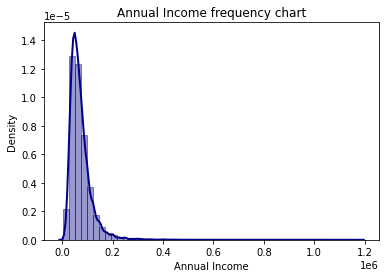

In [ ]:
ax = sns.distplot(data['annual_income'].dropna(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income frequency chart'); 
plt.show()

In [ ]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,80586.000,72814.000,85085.000,72814.000,55860.000,88902.000,40400.000,88902.000,88902.000,88902.000,88902.000,88710.000,88894.000
mean,13983.495,720.047,5.870,72187.041,954.728,18.315,35.081,11.110,0.160,15435.084,35964.049,0.113,0.028
std,8291.029,27.814,3.630,46469.111,628.205,7.049,22.009,4.978,0.474,19657.771,404194.077,0.343,0.257
min,491.000,585.000,0.000,4033.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7810.000,708.000,3.000,44636.000,528.525,13.500,16.000,8.000,0.000,5949.000,12775.000,0.000,0.000
50%,12058.000,728.000,6.000,61584.000,836.525,17.000,32.000,10.000,0.000,11039.000,21779.000,0.000,0.000
75%,19491.500,741.000,10.000,86784.000,1240.750,21.800,51.000,14.000,0.000,19300.750,36366.000,0.000,0.000
max,35875.000,751.000,10.000,1181520.000,10831.650,70.500,176.000,76.000,15.000,1730472.000,69988086.000,7.000,15.000


#### Outlier Treatment: Years of Credit History

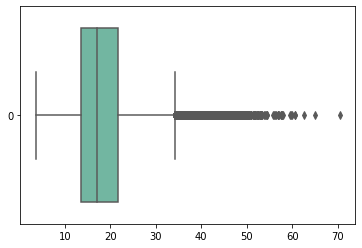

In [ ]:
ax = sns.boxplot(data=data['years_of_credit_history'], orient="h", palette="Set2")

In [ ]:
data[data['years_of_credit_history']>58].shape

(8, 19)

In [ ]:
data = data.drop(data[data['years_of_credit_history']>58].index.values)

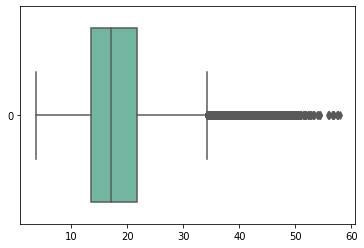

In [ ]:
ax = sns.boxplot(data=data['years_of_credit_history'], orient="h", palette="Set2")

In [ ]:
data.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,80578.000,72808.000,85079.000,72808.000,55857.000,88894.000,40395.000,88894.000,88894.000,88894.000,88894.000,88702.000,88886.000
mean,13983.217,720.047,5.869,72187.605,954.720,18.311,35.081,11.110,0.160,15435.144,35965.132,0.113,0.028
std,8291.009,27.814,3.630,46470.095,628.217,7.037,22.009,4.979,0.474,19657.904,404212.200,0.343,0.257
min,491.000,585.000,0.000,4033.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7810.000,708.000,3.000,44636.000,528.510,13.500,16.000,8.000,0.000,5949.000,12775.000,0.000,0.000
50%,12058.000,728.000,6.000,61585.000,836.510,17.000,32.000,10.000,0.000,11039.000,21779.000,0.000,0.000
75%,19490.000,741.000,10.000,86784.000,1240.750,21.800,51.000,14.000,0.000,19300.750,36366.750,0.000,0.000
max,35875.000,751.000,10.000,1181520.000,10831.650,58.000,176.000,76.000,15.000,1730472.000,69988086.000,7.000,15.000


#### Outlier treatment: Number of Open Accounts

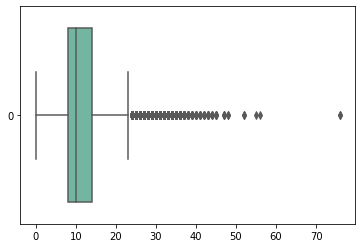

In [ ]:
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [ ]:
data[data['number_of_open_accounts']>50]

,loan_id,customer_id,loan_status,current_loan_amount,term,credit_score,years_in_current_job,home_ownership,annual_income,purpose,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
2251,08dab131-9db3-4184-a32a-e12e48fd5d6c,907c2a89-76f8-4089-9a47-d410bb885339,Charged Off,18755.000,Long Term,670.000,7.000,Rent,46912.000,Debt Consolidation,1032.060,27.400,nan,76,0,22111,28131,0.000,0.000
40856,f4e0a453-a5ec-4011-9513-9d203ffe8e3c,3e62a9e2-a61b-472d-8e56-234e30061580,Charged Off,20426.000,Short Term,708.000,5.000,Home Mortgage,122556.000,Debt Consolidation,2195.800,15.700,nan,76,0,40606,121575,0.000,0.000
47246,8c32029e-0af5-4d1f-852f-2f0325bf6f42,50636032-0df6-4e6d-af9d-474f317c77e0,Charged Off,5837.000,Short Term,711.000,3.000,Own Home,36297.000,Debt Consolidation,356.920,8.900,nan,52,0,1678,12342,0.000,0.000
47944,7d000d90-1538-4d4d-b7c2-15724be2025e,080f449b-c0b7-4226-8a51-cdcc7e68954f,Fully Paid,6082.000,Short Term,742.000,10.000,Home Mortgage,71973.000,Debt Consolidation,422.840,18.700,nan,52,0,7234,164404,0.000,0.000
65859,4f8a7824-b9bd-4b8c-b2a1-6b7b196d2c0f,67a534d6-7038-4e0b-8d42-8aab6d220701,Fully Paid,28185.000,Long Term,744.000,2.000,Home Mortgage,201320.000,Debt Consolidation,nan,15.600,nan,55,0,34159,185646,0.000,0.000
83562,1653fa6e-eaef-41ce-831c-db5172fc966b,9646ae9b-104e-4b8d-913a-cecfbcd11de4,Fully Paid,18214.000,Short Term,721.000,8.000,Rent,67440.000,Debt Consolidation,nan,16.800,nan,56,0,33929,55169,0.000,0.000


In [ ]:
data = data.drop(data[data['number_of_open_accounts']>50].index.values)

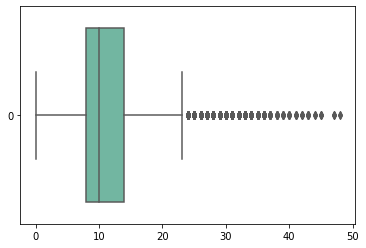

In [ ]:
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [ ]:
#Capping the outliers
IQR = data['number_of_open_accounts'].quantile(0.75) - data['number_of_open_accounts'].quantile(0.25)
upper_limit = data['number_of_open_accounts'].quantile(0.75) + (IQR * 1.5)
print("Upper Limit:", upper_limit)

Upper Limit: 23.0


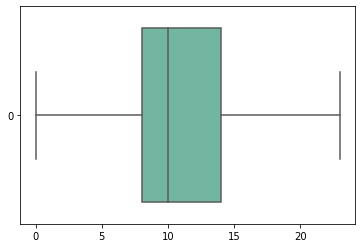

In [ ]:
data['number_of_open_accounts'] = [23.0 if ( x>23.0 and x!=np.nan) else x for x in data['number_of_open_accounts']]
ax = sns.boxplot(data=data['number_of_open_accounts'], orient="h", palette="Set2")

In [ ]:
print(data.shape)
data.describe()

(88888, 19)


,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,80572.000,72802.000,85073.000,72802.000,55853.000,88888.000,40395.000,88888.000,88888.000,88888.000,88888.000,88696.000,88880.000
mean,13983.048,720.047,5.869,72186.047,954.716,18.311,35.081,11.012,0.160,15434.614,35961.177,0.113,0.028
std,8291.009,27.815,3.630,46468.882,628.208,7.037,22.009,4.645,0.474,19658.102,404225.185,0.343,0.257
min,491.000,585.000,0.000,4033.000,0.000,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7810.000,708.000,3.000,44636.000,528.530,13.500,16.000,8.000,0.000,5949.000,12775.000,0.000,0.000
50%,12058.000,728.000,6.000,61584.000,836.510,17.000,32.000,10.000,0.000,11039.000,21776.000,0.000,0.000
75%,19490.000,741.000,10.000,86784.000,1240.750,21.800,51.000,14.000,0.000,19299.250,36366.000,0.000,0.000
max,35875.000,751.000,10.000,1181520.000,10831.650,58.000,176.000,23.000,15.000,1730472.000,69988086.000,7.000,15.000


In [ ]:
data.to_csv("Partialclean_Loandata.csv", index=False)

In [ ]:
data = pd.read_csv("Partialclean_Loandata.csv")
data.shape

(88888, 19)

Now, all outliers has been handled so let's check the missing values.

In [ ]:
data.isnull().sum()

loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              8316
term                                0
credit_score                    16086
years_in_current_job             3815
home_ownership                      0
annual_income                   16086
purpose                             0
monthly_debt                    33035
years_of_credit_history             0
months_since_last_delinquent    48493
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                      192
tax_liens                           8
dtype: int64

#### Missing Value Treatment: Bankruptcies & Tax Liens

Reference Link for Iterative Imputing:
https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#sphx-glr-auto-examples-impute-plot-iterative-imputer-variants-comparison-py

In [ ]:
# Since percentage value of Missing values in Bankruptcies and Tax Liens are very low we can delete the rows
data = data.dropna(subset=['bankruptcies', 'tax_liens'])
print(data.shape)
data.isnull().sum()

(88696, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              8295
term                                0
credit_score                    16049
years_in_current_job             3815
home_ownership                      0
annual_income                   16049
purpose                             0
monthly_debt                    32973
years_of_credit_history             0
months_since_last_delinquent    48492
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Months Since Last Delinquent

This feature describes the number of months since the credit is not paid, so NA's actually are the genuine customers so replacing it with 0.

In [ ]:
data["months_since_last_delinquent"].fillna(0, inplace = True)
print(data.shape)
data.isnull().sum()

(88696, 19)


loan_id                             0
customer_id                         0
loan_status                         0
current_loan_amount              8295
term                                0
credit_score                    16049
years_in_current_job             3815
home_ownership                      0
annual_income                   16049
purpose                             0
monthly_debt                    32973
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

#### Missing Value Treatment: Current Loan Amount, Credit Score, Years In Current Job, Annual Income

Applying **'Iterative Imputer'** using default estimator **'Bayesian Ridge'** which is **Regularized Linear Regression**.

In [ ]:
data.reset_index(drop=True, inplace=True)
my_imputer = IterativeImputer()
#For this we need only numerical variables so filtering this
data_numerical = data._get_numeric_data()
data_numerical_columns = data_numerical.columns 
print(data_numerical.shape)
data_numerical.isnull().sum()

(88696, 13)


current_loan_amount              8295
credit_score                    16049
years_in_current_job             3815
annual_income                   16049
monthly_debt                    32973
years_of_credit_history             0
months_since_last_delinquent        0
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 0
bankruptcies                        0
tax_liens                           0
dtype: int64

In [ ]:
data_imputed = my_imputer.fit_transform(data_numerical)
#Imputer will give the array as an object so need to convert it to Dataframe with columns
data_imputed = pd.DataFrame(data_imputed, columns=data_numerical_columns)
data_imputed.isnull().sum()

current_loan_amount             0
credit_score                    0
years_in_current_job            0
annual_income                   0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

In [ ]:
data_imputed.describe()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000,88696.000
mean,13865.129,720.166,5.892,71940.021,966.537,18.306,15.948,11.015,0.161,15439.161,35800.372,0.113,0.028
std,8012.791,25.409,3.559,44707.950,586.225,7.037,22.920,4.643,0.474,19656.190,402564.760,0.343,0.257
min,701.000,585.000,0.000,-5158.546,-361.109,3.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,7998.000,711.000,3.000,44876.000,582.420,13.500,0.000,8.000,0.000,5957.000,12779.000,0.000,0.000
50%,12043.000,725.000,6.000,62242.000,864.859,17.000,0.000,10.000,0.000,11048.000,21779.000,0.000,0.000
75%,18416.000,739.000,10.000,86826.500,1227.360,21.800,29.000,14.000,0.000,19304.000,36364.000,0.000,0.000
max,87109.717,802.634,10.440,1181520.000,10831.650,58.000,176.000,23.000,15.000,1730472.000,69988086.000,7.000,15.000


Plotting histogram to see the difference between without na values and after replacing na values with Iterative Imputer. <br>
data_numerical is our Dataframe with NA's, while, data_imputed is our Dataframe without NA's.

#### Histogram: Current Loan Amount

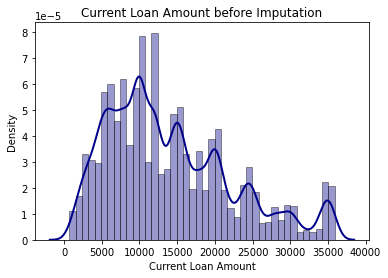

In [ ]:
ax = sns.distplot(data_numerical['current_loan_amount'].dropna(), hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount before Imputation'); 
plt.show()

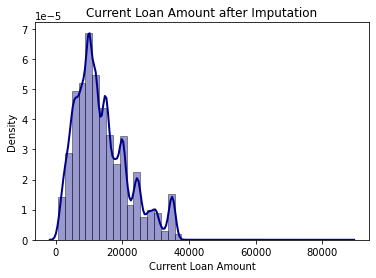

In [ ]:
ax = sns.distplot(data_imputed['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

In [ ]:
temp = data_imputed[data_imputed['current_loan_amount']<40000]

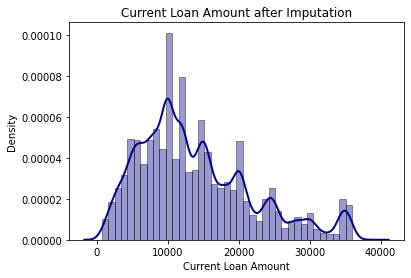

In [ ]:
ax = sns.distplot(temp['current_loan_amount'], hist=True, kde=True, 
             bins=int(42740/1000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Current Loan Amount') 
plt.title('Current Loan Amount after Imputation'); 
plt.show()

#### Histogram: Credit Score

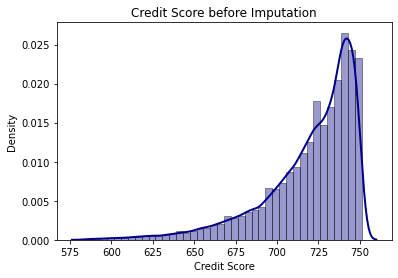

In [ ]:
ax = sns.distplot(data_numerical['credit_score'].dropna(), hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score before Imputation'); 
plt.show()

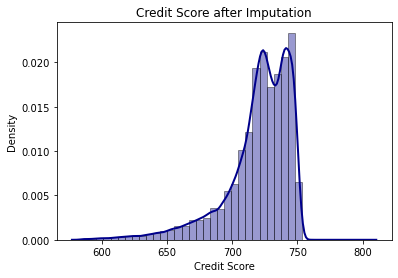

In [ ]:
ax = sns.distplot(data_imputed['credit_score'], hist=True, kde=True, 
             bins=int(800/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Credit Score') 
plt.title('Credit Score after Imputation'); 
plt.show() 

#### Histogram: Annual Income

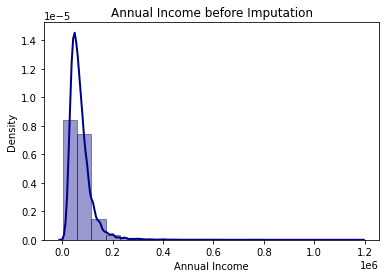

In [ ]:
ax = sns.distplot(data_numerical['annual_income'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income before Imputation'); 
plt.show()

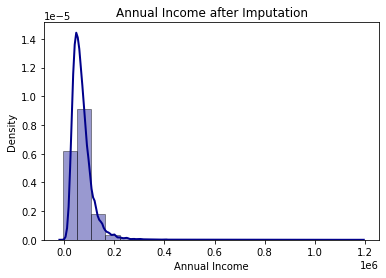

In [ ]:
ax = sns.distplot(data_imputed['annual_income'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Annual Income') 
plt.title('Annual Income after Imputation'); 
plt.show()

#### Histogram: Years In Current Job

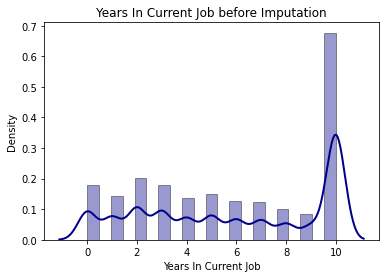

In [ ]:
ax = sns.distplot(data_numerical['years_in_current_job'].dropna(), hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job before Imputation'); 
plt.show()

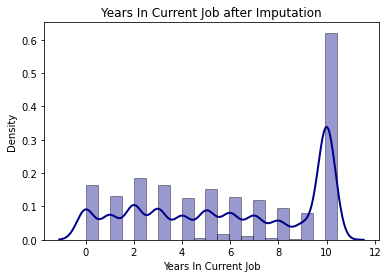

In [ ]:
ax = sns.distplot(data_imputed['years_in_current_job'], hist=True, kde=True, 
             bins=int(215580/10000), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Years In Current Job') 
plt.title('Years In Current Job after Imputation'); 
plt.show()

Replacing the feature in data dataframe by above Imputed dataframe.

In [ ]:
data_imputed.shape

(88696, 13)

In [ ]:
data.shape

(88696, 19)

In [ ]:
data['years_in_current_job'] = data_imputed['years_in_current_job']
data['current_loan_amount'] = data_imputed['current_loan_amount']
data['credit_score'] = data_imputed['credit_score']
data['annual_income'] = data_imputed['annual_income']
data['monthly_debt'] = data_imputed['monthly_debt']

In [ ]:
print(data.shape)
data.isnull().sum()

(88696, 19)


loan_id                         0
customer_id                     0
loan_status                     0
current_loan_amount             0
term                            0
credit_score                    0
years_in_current_job            0
home_ownership                  0
annual_income                   0
purpose                         0
monthly_debt                    0
years_of_credit_history         0
months_since_last_delinquent    0
number_of_open_accounts         0
number_of_credit_problems       0
current_credit_balance          0
maximum_open_credit             0
bankruptcies                    0
tax_liens                       0
dtype: int64

#### Converting Months since last delinquent into categories

In [ ]:
data['months_since_last_delinquent'] = ['extreme_risk' if x>51 
        else 'high_risk' if x>32 
        else 'moderate_risk' if x>16 
        else 'low_risk' if x>0 else 'no_risk' for x in data['months_since_last_delinquent']]

In [ ]:
data['months_since_last_delinquent'].unique()

array(['low_risk', 'no_risk', 'moderate_risk', 'extreme_risk',
       'high_risk'], dtype=object)

**Dropping of Loan ID and Customer ID as we have removed the duplicates and now it's not required further.**

In [ ]:
data.drop(['loan_id', 'customer_id'], axis=1, inplace=True)

In [ ]:
data.shape

(88696, 17)

### Handling Categorical Variables

We have 5 Categorical Variables in our data which are as below: <br>
1. Term
2. Home Ownership
3. Purpose
4. Months Since Last Delinquent
5. Loan Status

We will apply Label Encoding to Loan Status as this is a dependent variable, while for other we will apply One Hot Encoding.

In [ ]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
data['loan_status'] = le.fit_transform(data.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


In [ ]:
data.loan_status.unique()

array([0, 1])

In [ ]:
data.term.unique()

array(['Short Term', 'Long Term'], dtype=object)

In [ ]:
data.home_ownership.unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [ ]:
data['home_ownership'] = ['Mortgage' if 'Mortgage' in x else x for x in data['home_ownership']]

In [ ]:
data.home_ownership.unique()

array(['Rent', 'Mortgage', 'Own Home'], dtype=object)

In [ ]:
data.purpose.unique()

array(['Debt Consolidation', 'Home Improvements', 'other',
       'Business Loan', 'small_business', 'Other', 'moving', 'Buy a Car',
       'Medical Bills', 'Buy House', 'Take a Trip', 'vacation',
       'major_purchase', 'Educational Expenses', 'wedding',
       'renewable_energy'], dtype=object)

So if you see here there can be n number of purpose to take loan its define and its actually not needed to data the model so dropping this feature.

In [ ]:
data.drop(['purpose'], axis=1, inplace=True)

In [ ]:
data.months_since_last_delinquent.unique()

array(['low_risk', 'no_risk', 'moderate_risk', 'extreme_risk',
       'high_risk'], dtype=object)

In [ ]:
cols_to_transform = ['term', 'months_since_last_delinquent', 'home_ownership' ]
data_with_dummies = pd.get_dummies(data, prefix=cols_to_transform )

In [ ]:
data_with_dummies

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,term_Long Term,term_Short Term,months_since_last_delinquent_Mortgage,months_since_last_delinquent_Own Home,months_since_last_delinquent_Rent,home_ownership_extreme_risk,home_ownership_high_risk,home_ownership_low_risk,home_ownership_moderate_risk,home_ownership_no_risk
0,0,12232.000,728.000,0.000,46643.000,777.390,18.000,12.000,0,6762,7946,0.000,0.000,0,1,0,0,1,0,0,1,0,0
1,0,25014.000,733.000,10.000,81099.000,892.090,26.700,14.000,0,35706,77961,0.000,0.000,1,0,1,0,0,0,0,0,0,1
2,0,16117.000,724.000,9.000,60438.000,1244.020,16.700,11.000,1,11275,14815,1.000,0.000,0,1,1,0,0,0,0,0,1,0
3,0,11716.000,740.000,3.000,34171.000,990.940,10.000,21.000,0,7009,43533,0.000,0.000,0,1,0,0,1,0,0,0,0,1
4,0,9789.000,686.000,10.000,47003.000,503.710,16.700,13.000,1,16913,19553,1.000,0.000,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88691,1,35868.000,681.000,6.000,128100.000,2102.970,28.100,17.000,0,115354,117708,0.000,0.000,1,0,1,0,0,0,0,0,0,1
88692,1,35868.000,709.000,0.000,97356.000,1842.970,24.400,23.000,0,41150,94597,0.000,0.000,0,1,1,0,0,0,0,0,0,1
88693,1,35872.000,713.000,10.000,117864.000,1780.167,17.300,17.000,0,33277,56690,0.000,0.000,1,0,1,0,0,0,0,0,0,1
88694,1,35875.000,672.000,10.000,92250.000,1572.625,8.500,11.000,0,51132,69948,0.000,0.000,1,0,0,0,1,0,0,0,0,1


### EDA

#### Checking the distribution of Dependent Variable

In [ ]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(data_with_dummies['loan_status'])
percentage_labels = (data_with_dummies['loan_status'].value_counts()/total_len)*100
percentage_labels

1   71.693
0   28.307
Name: loan_status, dtype: float64

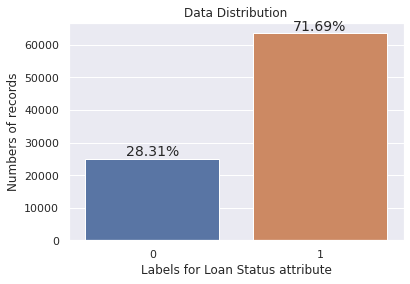

In [ ]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(data_with_dummies.loan_status).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(8,8)})
ax.set_xlabel("Labels for Loan Status attribute")
ax.set_ylabel("Numbers of records")
plt.show()

In [ ]:
# Get the correlation of the dataing dataset
correlation = data_with_dummies[1:].corr()
correlation

,loan_status,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens,term_Long Term,term_Short Term,months_since_last_delinquent_Mortgage,months_since_last_delinquent_Own Home,months_since_last_delinquent_Rent,home_ownership_extreme_risk,home_ownership_high_risk,home_ownership_low_risk,home_ownership_moderate_risk,home_ownership_no_risk
loan_status,1.000,-0.069,0.189,0.005,0.061,-0.006,0.039,-0.017,-0.012,0.009,0.011,0.000,-0.015,-0.176,0.176,0.062,-0.004,-0.060,0.003,0.002,-0.020,0.006,0.006
current_loan_amount,-0.069,1.000,-0.251,0.119,0.465,0.490,0.158,0.214,-0.076,0.338,0.036,-0.104,0.019,0.406,-0.406,0.190,-0.024,-0.178,-0.017,-0.011,0.032,-0.005,0.001
credit_score,0.189,-0.251,1.000,-0.016,-0.017,-0.125,0.093,-0.027,-0.056,-0.012,0.024,-0.041,-0.024,-0.455,0.455,0.041,-0.006,-0.038,-0.031,-0.026,-0.059,-0.039,0.098
years_in_current_job,0.005,0.119,-0.016,1.000,0.093,0.133,0.231,0.056,0.042,0.097,0.002,0.044,0.012,0.064,-0.064,0.196,0.013,-0.206,0.024,0.023,0.031,0.019,-0.062
annual_income,0.061,0.465,-0.017,0.093,1.000,0.730,0.199,0.183,-0.021,0.378,0.054,-0.060,0.050,0.102,-0.102,0.210,-0.046,-0.185,-0.004,0.014,0.067,0.026,-0.066
monthly_debt,-0.006,0.490,-0.125,0.133,0.730,1.000,0.206,0.450,-0.056,0.516,0.045,-0.084,0.022,0.163,-0.163,0.216,-0.038,-0.197,-0.002,0.008,0.063,0.013,-0.052
years_of_credit_history,0.039,0.158,0.093,0.231,0.199,0.206,1.000,0.132,0.061,0.205,0.031,0.064,0.021,0.035,-0.035,0.179,0.032,-0.200,0.034,0.046,0.077,0.051,-0.133
number_of_open_accounts,-0.017,0.214,-0.027,0.056,0.183,0.450,0.132,1.000,-0.014,0.228,0.030,-0.025,0.008,0.078,-0.078,0.140,-0.012,-0.135,0.015,0.014,0.057,0.017,-0.065
number_of_credit_problems,-0.012,-0.076,-0.056,0.042,-0.021,-0.056,0.061,-0.014,1.000,-0.108,-0.012,0.751,0.589,-0.023,0.023,-0.003,0.011,-0.003,0.081,0.012,-0.020,-0.010,-0.040
current_credit_balance,0.009,0.338,-0.012,0.097,0.378,0.516,0.205,0.228,-0.108,1.000,0.133,-0.120,-0.014,0.094,-0.094,0.156,0.002,-0.159,-0.041,-0.032,-0.016,-0.034,0.078


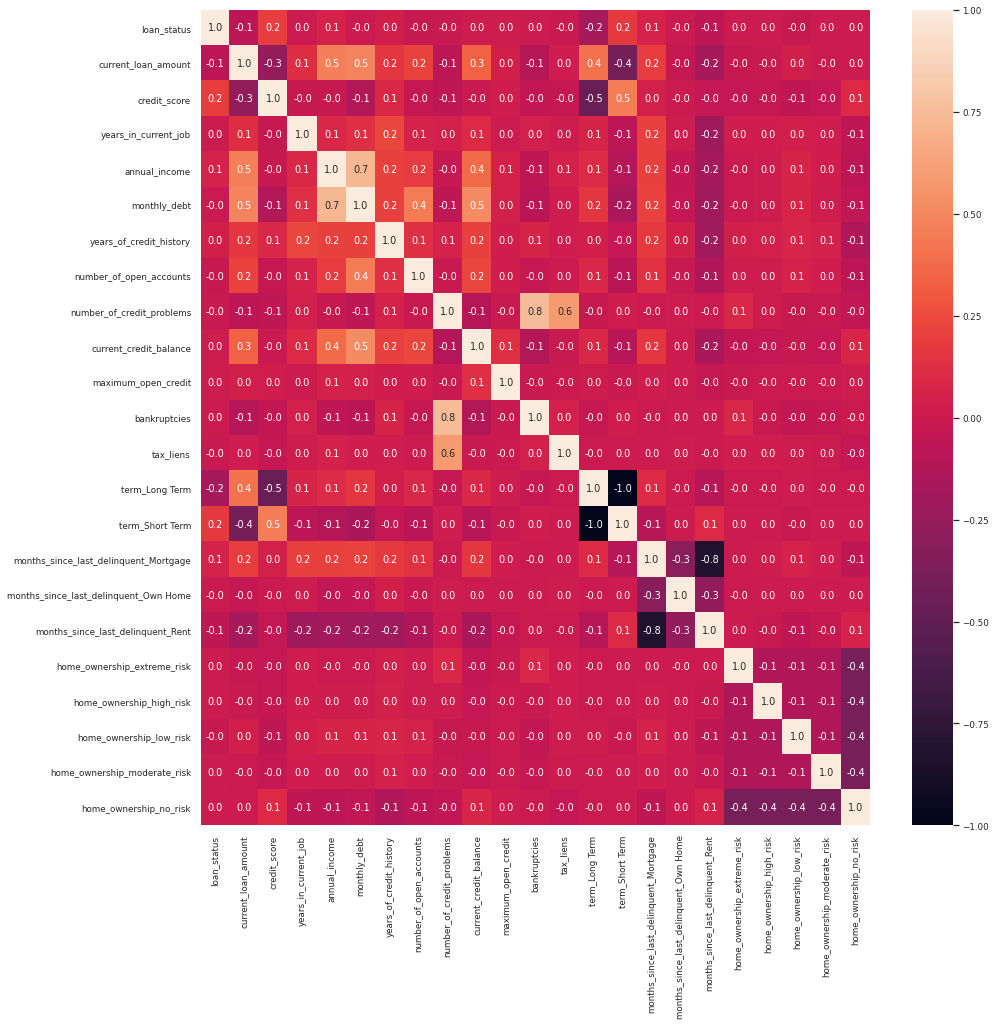

In [ ]:
sns.set(font_scale=0.8)
sns.heatmap(data_with_dummies[1:].corr(),annot=True,fmt=".1f")
sns.set(rc={'figure.figsize':(25,15)})
plt.show()

### Feature Selection

In [ ]:
X = data_with_dummies.drop('loan_status',axis=1)
y = data_with_dummies.loan_status

In [ ]:
features_label = X.columns

In [ ]:
#Fitting Random Forest Classification to the dataing set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
importances = classifier.feature_importances_
print(importances)

[0.11416763 0.11644551 0.05477654 0.11373284 0.11171872 0.1015484
 0.06926857 0.01000326 0.10755344 0.10976259 0.00731478 0.00329085
 0.01061108 0.01040144 0.00572181 0.00470582 0.00590615 0.00784713
 0.00794531 0.00774094 0.00801372 0.01152344]


In [ ]:
indices = np.argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) current_loan_amount            0.116446
 2) credit_score                   0.114168
 3) years_in_current_job           0.113733
 4) annual_income                  0.111719
 5) monthly_debt                   0.109763
 6) years_of_credit_history        0.107553
 7) number_of_open_accounts        0.101548
 8) number_of_credit_problems      0.069269
 9) current_credit_balance         0.054777
10) maximum_open_credit            0.011523
11) bankruptcies                   0.010611
12) tax_liens                      0.010401
13) term_Long Term                 0.010003
14) term_Short Term                0.008014
15) months_since_last_delinquent_Mortgage 0.007945
16) months_since_last_delinquent_Own Home 0.007847
17) months_since_last_delinquent_Rent 0.007741
18) home_ownership_extreme_risk    0.007315
19) home_ownership_high_risk       0.005906
20) home_ownership_low_risk        0.005722
21) home_ownership_moderate_risk   0.004706
22) home_ownership_no_risk         0.003291


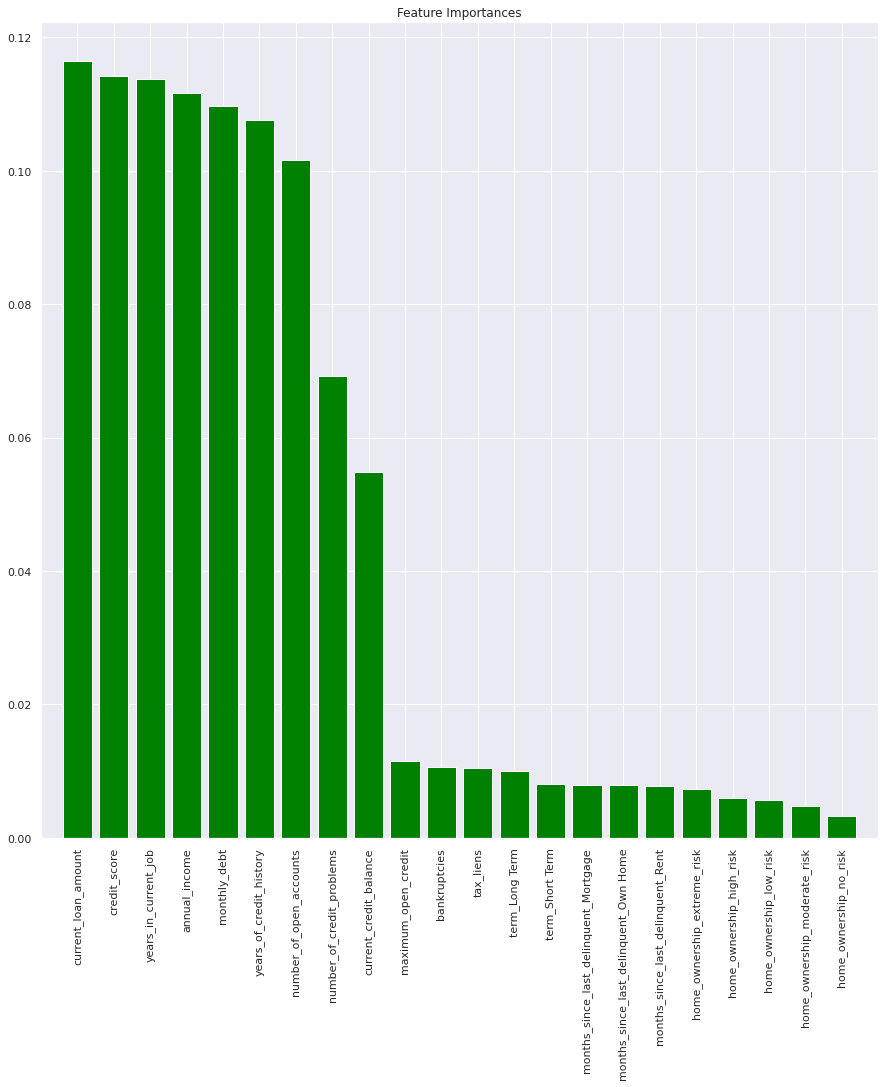

In [ ]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

### Train and Build Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,auc

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
Random = RandomForestClassifier(n_estimators=10)

Random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)


In [ ]:
cm

array([[ 1561,  3452],
       [ 2036, 10691]])

In [ ]:
accuracy

0.6906426155580608

#### Filtering Features

In [ ]:
X_filter = X[['current_loan_amount', 'credit_score', 'years_in_current_job', 'annual_income', 'monthly_debt', 'years_of_credit_history',
             'number_of_open_accounts', 'number_of_credit_problems', 'current_credit_balance']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_filter, y, test_size = 0.20, random_state = 42, stratify=y)

In [ ]:
Random = RandomForestClassifier(n_estimators=10)

Random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


In [ ]:
cm

array([[ 1489,  3533],
       [ 2275, 10443]])

In [ ]:
acc

0.6726042841037204

#### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [50,100,150,200,250,300]
# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20, 25, 30, 35]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'min_samples_split': min_samples_split}
               

In [ ]:
#Use the random grid to search for best hyperparameters
#First create the base model to tune
rf = RandomForestClassifier()
#Random search of parameters, using 5 fold cross validation, 
#search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=5, random_state=42)
#Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'min_samples_split': [10, 15, 20, 25,
                                                              30, 35],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300]},
                   random_state=42)

In [ ]:
rf_random.best_params_

{'min_samples_split': 35, 'n_estimators': 300}

In [ ]:
Random = RandomForestClassifier(n_estimators=300, min_samples_split=35, max_features='sqrt', 
                               bootstrap=True, oob_score=True, random_state=42)

Random.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_split=35,
                       n_estimators=300, oob_score=True, random_state=42)

In [ ]:
# Predicting the Test set results
y_pred = Random.predict(X_test)

# Making the Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [ ]:
cm

array([[  461,  4561],
       [  401, 12317]])

In [ ]:
acc

0.720293122886133

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(class_weight='balanced')
Logistic.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# Predicting the Test set results
y_pred = Logistic.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)


In [ ]:
cm

array([[2723, 2299],
       [5278, 7440]])

In [ ]:
acc

0.5728861330326944

#### KNN

In [ ]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [ ]:
cm

array([[  898,  4124],
       [ 1845, 10873]])

In [ ]:
acc

0.6635287485907554

#### Gradient Boosting

In [ ]:
# Fitting GradientBoosting to the Training set
from sklearn.ensemble import GradientBoostingClassifier
GradientBoo = GradientBoostingClassifier()
GradientBoo.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Predicting the Test set results
y_pred = GradientBoo.predict(X_test)

# Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
cm

array([[  197,  4825],
       [  159, 12559]])

In [ ]:
acc

0.7190529875986471

## Model Deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(Random, open('model_final.pkl','wb'))

In [ ]:
X_test.head()

,current_loan_amount,credit_score,years_in_current_job,annual_income,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance
37829,12753.000,739.000,10.000,54446.000,671.490,17.400,11.000,0,13933
8074,8974.272,737.000,3.000,29451.000,635.650,7.900,12.000,0,7828
71924,4891.000,706.000,5.000,103679.000,1145.348,16.700,12.000,0,4201
87978,34552.000,678.000,0.000,112541.000,1345.241,26.000,9.000,0,13378
74865,5362.000,716.000,10.000,35910.000,478.076,18.500,7.000,0,3198


In [ ]:
X_test.columns

Index(['current_loan_amount', 'credit_score', 'years_in_current_job',
       'annual_income', 'monthly_debt', 'years_of_credit_history',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance'],
      dtype='object')

In [ ]:
y_test.head()

37829    1
8074     1
71924    1
87978    1
74865    1
Name: loan_status, dtype: int64

In [ ]:
model = pickle.load(open('model_final.pkl','rb'))
print(model.predict([[10000, 580, 5, 500000, 1500, 15, 5, 0, 10000]]))

[0]


In [ ]:
model.predict([[12753.000,	739.000,	10.000,	54446.000,	671.490,	17.400,	11.000,	0	,13933]])

array([1])